Conversation link: https://chatgpt.com/share/673d9652-21bc-8010-b33a-ee879d9a5068

#### 1: 
a) Classification decision trees tackle classification problems where we want to assign a class given data. Multi linear regression predicts a continuous value. 
b) Classification decision tree makes classification by adjusting thresholds of variables, while multiple linear regression makes regression predictions based on adjusting coefficients of each variable and seeing how well it fits. 

#### 2: 

Accuracy: object detection of normal things (e.g. animals) in a balanced dataset, as we want **balanced and overall correctness**

Sensitivity: rare disease detection system, as we want to **minimize false negatives** (so want to maximize detection) 

Specificity: fraud detection in banking, as we want to avoid false positives (otherwise the customer will have to try many times) and focus on **correctly identifying negatives**

Precision: email spam filtering, as we want to see how many positives are truly positive, focusing on **accuracy of positive predictions**



#### 3:

In [27]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [6]:
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

In [12]:
ab_reduced_noNaN = ab.dropna()

In [14]:
# Convert 'Pub year' and 'NumPages' to integer type using .loc
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int, errors='ignore')
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int, errors='ignore')

# Convert 'Hard_or_Paper' to category type using .loc
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the updated DataFrame types
print(ab_reduced_noNaN.dtypes)

Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object


#### 4:

In [16]:

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report on the number of observations in each dataset
print(f"Training data set size: {ab_reduced_noNaN_train.shape[0]} observations")
print(f"Test data set size: {ab_reduced_noNaN_test.shape[0]} observations")


Training data set size: 255 observations
Test data set size: 64 observations


``y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`` turns the column into binary 1s and 0s if the book is hardcover or not, sets it to Y which is outcome variable. 

``X = ab_reduced_noNaN[['List Price']]`` uses List Price as the predictor variable.

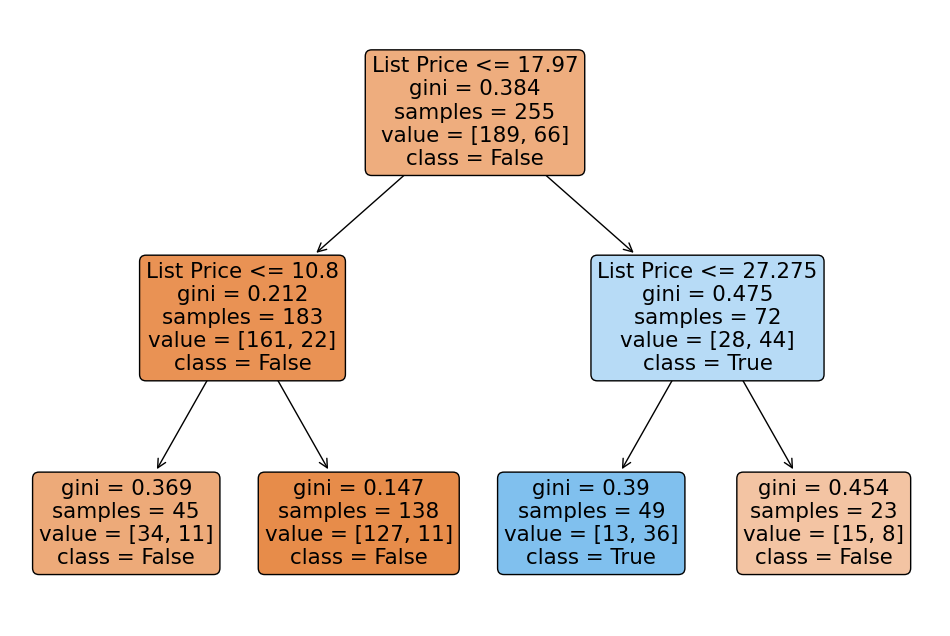

In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt

# Assuming ab_reduced_noNaN is already defined and contains the data

# Step 1: Prepare the data
# Create the target variable 'Y', ensuring 'H' column exists in the dummies
Y_1 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 'H' for Hardcover, assuming 'Hard_or_Paper' is the column
X_1 = ab_reduced_noNaN_train[['List Price']]  # Using List Price as the feature

# Step 2: Create the DecisionTreeClassifier model with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 3: Train the model on the training data
clf.fit(X_1, Y_1)

# Step 4: Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=clf.classes_.astype(str).tolist(), rounded=True)
plt.show()


If 17.97 <= list price <= 27.275, it's predicted that it's a hardcover. Otherwise, it's not. 

#### 5: 

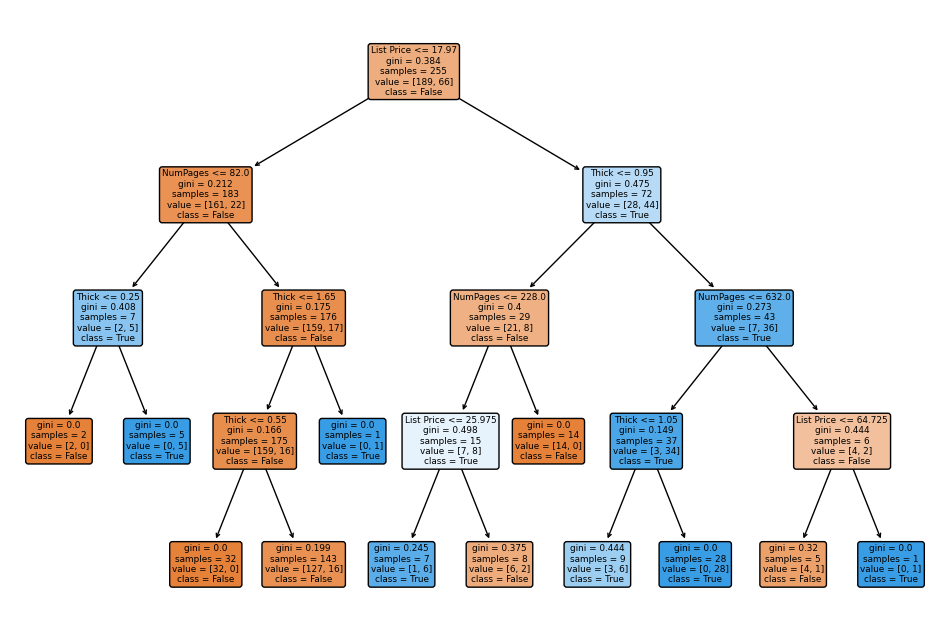

In [42]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Select features and target variable
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
Y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Create the DecisionTreeClassifier model with max_depth=4
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the data
clf2.fit(X, Y)

# Visualize the decision tree using matplotlib
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=clf2.classes_.astype(str).tolist(), rounded=True)
plt.show()


For the clf2 model, predictions are made given threshold of list price, then number of pages, then thickness of the book to predict whether it's a hardcover or not. 

#### 6: 

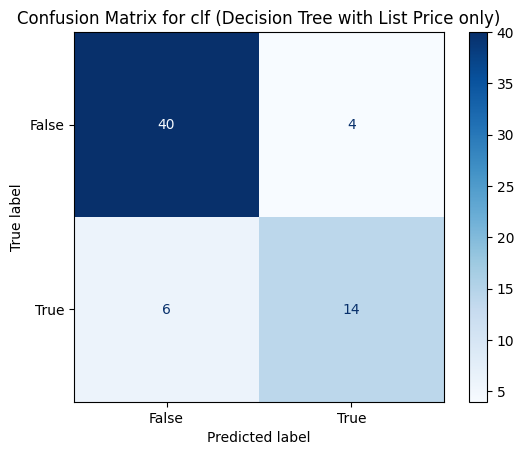

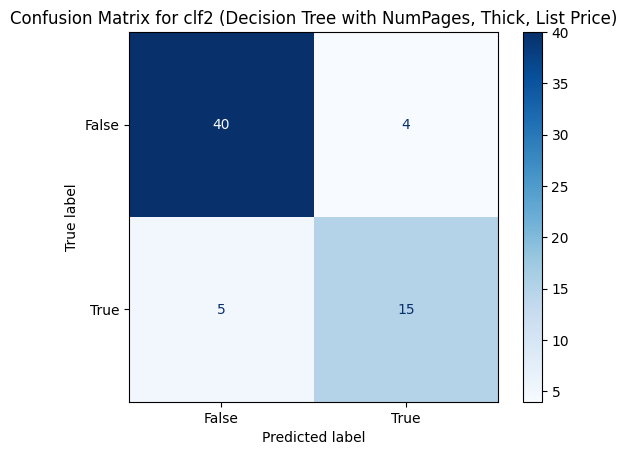

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already split the data into training and test sets, and trained clf and clf2 models

X_test_1 = ab_reduced_noNaN_test[['List Price']]
X_test_2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
Y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Make predictions on the test set (using the test set split earlier)
y_pred_clf = clf.predict(X_test_1)  # For clf model
y_pred_clf2 = clf2.predict(X_test_2)  # For clf2 model

# Create confusion matrices
cm_clf = confusion_matrix(Y_test, y_pred_clf)
cm_clf2 = confusion_matrix(Y_test, y_pred_clf2)

# Display confusion matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_)
disp_clf.plot(cmap="Blues")
plt.title("Confusion Matrix for clf (Decision Tree with List Price only)")
plt.show()

# Display confusion matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=clf2.classes_)
disp_clf2.plot(cmap="Blues")
plt.title("Confusion Matrix for clf2 (Decision Tree with NumPages, Thick, List Price)")
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix

# Extract the components of the confusion matrix (TP, TN, FP, FN)
def calculate_metrics(cm):
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN)
    
    # Specificity
    specificity = TN / (TN + FP)
    
    return accuracy, sensitivity, specificity

# Calculate metrics for clf
accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(cm_clf2)

# Print the results
print(f"Metrics for clf (Decision Tree with List Price only):")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nMetrics for clf2 (Decision Tree with NumPages, Thick, List Price):")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


Metrics for clf (Decision Tree with List Price only):
Accuracy: 0.8438
Sensitivity: 0.7000
Specificity: 0.9091

Metrics for clf2 (Decision Tree with NumPages, Thick, List Price):
Accuracy: 0.8594
Sensitivity: 0.7500
Specificity: 0.9091


#### 7:

Metrics for clf (Decision Tree with List Price only):
Accuracy: 0.8314
Sensitivity: 0.5455
Specificity: 0.9312

Metrics for clf2 (Decision Tree with NumPages, Thick, List Price):
Accuracy: 0.9098
Sensitivity: 0.7121
Specificity: 0.9788


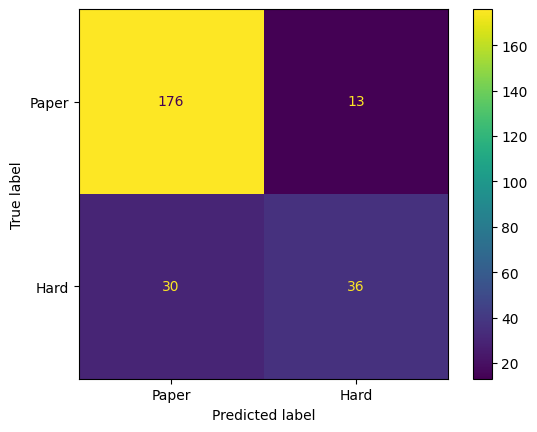

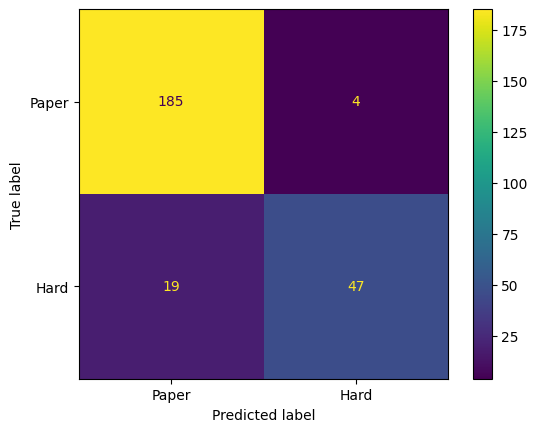

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming Y_train is already defined
Y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Create confusion matrix for clf (List Price)
cm_clf = confusion_matrix(Y_train, 
                          clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                          labels=[0, 1])

# Plot confusion matrix for clf
ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paper", "Hard"]).plot()

# Create confusion matrix for clf2 (NumPages, Thick, List Price)
cm_clf2 = confusion_matrix(Y_train, 
                           clf2.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]), 
                           labels=[0, 1])

# Plot confusion matrix for clf2
ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paper", "Hard"]).plot()

# Define a function to calculate accuracy, sensitivity, and specificity
def calculate_metrics(cm):
    # cm: confusion matrix, where:
    # cm[0, 0] = True Negative (TN)
    # cm[0, 1] = False Positive (FP)
    # cm[1, 0] = False Negative (FN)
    # cm[1, 1] = True Positive (TP)
    
    TN, FP, FN, TP = cm.ravel()
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # Also called recall or true positive rate
    specificity = TN / (TN + FP)  # Also called true negative rate
    
    return accuracy, sensitivity, specificity

# Calculate metrics for clf
accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(cm_clf2)

# Print the results
print(f"Metrics for clf (Decision Tree with List Price only):")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nMetrics for clf2 (Decision Tree with NumPages, Thick, List Price):")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


The differences between the confusion matrices is that one predicts only based on List Price, and the other predicts based on the number of pages and thickness of the book too. 

It is also looking at the confusion matrix of the training dataset rather than the test dataset. This means it's likely that the predictions are much more accurate than if it was on the test dataset. 

We can see the clf2 one is better, as accuracy is 0.9 while clf1 accuracy is 0.83. This means overall correctly classified samples is higher with clf2. Sensitivity for clf1 is 0.54, while sensitivity of clf2 is 0.71. This means clf2 is also much better at identifying true positives compared to clf1. 

This is because clf2 is considering more predictor variables when trying to classify whether a book is hardcover or not, and thus uses much more depth. Additionally, **by analyzing the thickness of the book, which would have a stronger correlation with whether a book is hardcover or not**, clf2 has better predictions. 

#### 8: 

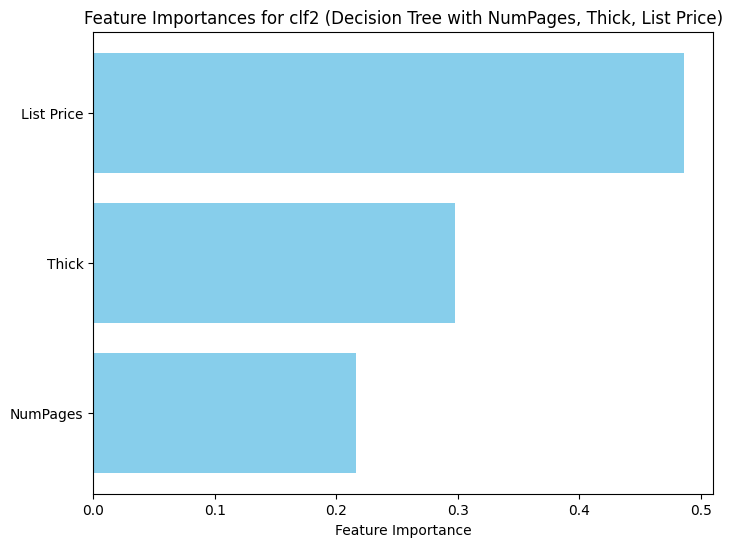

The most important feature for making predictions is: List Price


In [59]:
import matplotlib.pyplot as plt

# Get feature importances from clf2
importances = clf2.feature_importances_

# Get the feature names from clf2
feature_names = clf2.feature_names_in_

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances for clf2 (Decision Tree with NumPages, Thick, List Price)")
plt.show()

# Print out which feature is the most important
most_important_feature = feature_names[importances.argmax()]
print(f"The most important feature for making predictions is: {most_important_feature}")


#### 9:

Interpreting coefficients in linear model regressions represent change in predicted variable given a predictor variable. This directly correlates with the outcome variable.  

Feature importance describes how much each feature contributes to reducing prediction error. This does not have a direct relationship with the outcome variable, but is a normalized arbitrary value that tells us more about the predictor variable. 

In this conversation, we discussed several key topics related to machine learning and model evaluation, specifically focusing on decision trees and regression models. We explored how to visualize decision trees, calculate model metrics such as accuracy, sensitivity, and specificity, and understand the concept of feature importance in decision trees. We also compared the interpretation of coefficients in linear regression models to feature importances in decision trees. 

Key points include:
1. **Decision Tree Visualization**: We explored how to visualize and interpret decision trees, including how predictions are made and how to plot the tree.
2. **Model Evaluation**: We calculated and discussed metrics like accuracy, sensitivity, and specificity for classification models, explaining their significance.
3. **Feature Importance**: We discussed how feature importances in decision trees reflect the contribution of each feature to the model’s predictions, in contrast to the direct relationship between coefficients and outcomes in linear regression.
